In [1]:
import numpy as np
from scipy.signal import convolve2d
import matplotlib.pyplot as plt

np.random.seed(1)

# Parameters

In [2]:
height,width = 100,100
organism_count = 1
mask_ratio=0.5

r_a=21
factor=3

alpha = 0.028
#alpha_n = 0.028
#alpha_m = 0.147

b1=0.257
b2=0.336
d1=0.365
d2=0.549

dt=0.5# 0.5 0.005

# CoDE

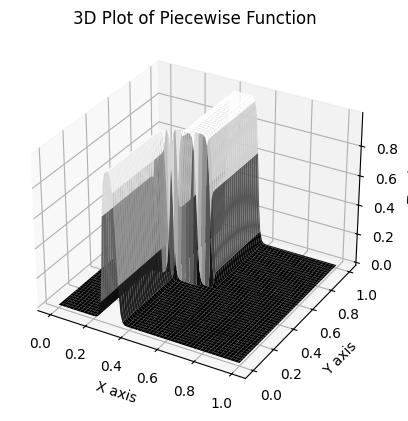

In [3]:
def sigma1(x,a,alpha):
    return 1.0/(1.0+np.exp(-1*(x-a)*4/alpha))
def sigma2(x, a, b, alpha):
    return sigma1(x, a, alpha) * (1.0 - sigma1(x, b, alpha))
def sigmam(x, y, m, alpha):
    return x*(1.0-sigma1(m, 0.5, alpha)) + y*sigma1(m, 0.5, alpha)
def s(n, m, b1, d1, b2, d2, alpha):
    return sigma2(n, sigmam(b1, d1, m, alpha), sigmam(b2, d2, m, alpha), alpha)

# Test the function with a grid of values
Ui_values = np.linspace(0, 1, 100)
Uo_values = np.linspace(0, 1, 100)
Z = np.zeros((100, 100))

x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)
X, Y = np.meshgrid(x, y)

# Evaluate the function on the grid
Z = np.vectorize(s)(X, Y, b1, d1, b2, d2, alpha)

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='gray')

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.title('3D Plot of Piecewise Function')
plt.show()

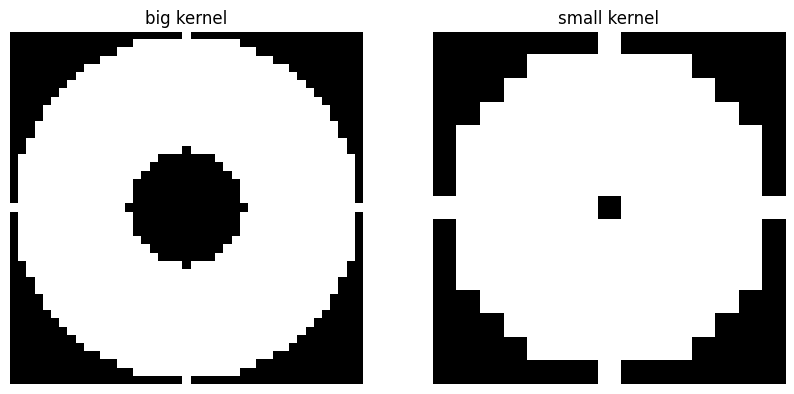

In [4]:
def circular_kernel(r):
    kernel = np.zeros((r*2+1,r*2+1))
    for row in range(kernel.shape[0]):
        for col in range(kernel.shape[1]):
            x,y=col,(r*2)-row
            if r**2 >= (x-r)**2 +(y-r)**2:
                kernel[row][col]=1
    return kernel

def circular_kernel_pair(r_a,factor):
    m = circular_kernel(r_a)
    r_i = r_a//factor
    n = circular_kernel(r_i)

    m[r_a-r_i:r_a+1+r_i,r_a-r_i:r_a+1+r_i]-=n
    n[r_i,r_i]=0
    m[r_a,r_a]=0
    return (m,n)

b_kernel, s_kernel = circular_kernel_pair(r_a,factor)


fig, ax = plt.subplots(1, 2,figsize=(10,5))
ax[0].imshow(b_kernel, cmap='gray',)
ax[0].set_title("big kernel")
ax[1].imshow(s_kernel, cmap='gray')
ax[1].set_title("small kernel")
ax[0].axis("off")
ax[1].axis("off")
plt.show()

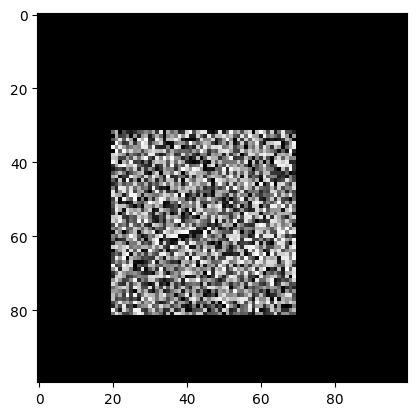

In [5]:
world_states = np.zeros((height,width),dtype=np.float16)
mask_height, mask_width = int(height*mask_ratio),int(width*mask_ratio)
for i in range(organism_count):
    mask = np.random.rand(mask_height, mask_width)
    start_x = np.random.randint(0, width-mask_width+1)
    start_y = np.random.randint(0, height-mask_height+1)

    world_states[start_y:start_y+mask_height\
                ,start_x:start_x+mask_width] += mask
#world_states[world_states>1]=1


plt.imshow(world_states, cmap='gray')

# main code

# PART 1


calculate C_outer and C_inner
* Ki * C^t = closer_sum
* Ko * C^t = bigger_sum

* max_inner
* max_outer

In [6]:
def run_sim(world_states, s_kernel, b_kernel, b1, d1, b2, d2, alpha):
    n = convolve2d(world_states, s_kernel, mode='same')
    N = s_kernel.sum().sum()

    m = convolve2d(world_states, b_kernel, mode='same')
    M = b_kernel.sum().sum()

    n = n / N
    m = m / M
    
    apply_s_func = np.vectorize(s)

    q = apply_s_func(n, m, b1 ,d1, b2, d2, alpha)
    world_states_diff= 2*q - 1
    return world_states_diff

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ...

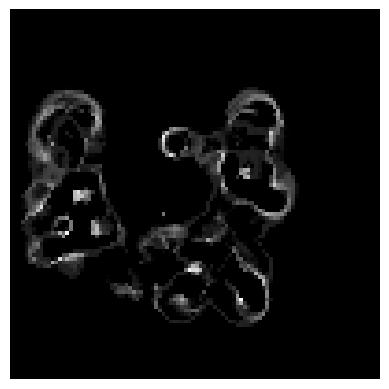

In [7]:
plt.imshow(world_states, cmap='gray')
plt.axis('off')
#plt.savefig(f'./ims/output_image{0}.jpg', bbox_inches='tight', pad_inches=0)

for i in range(1,100):
    world_states_diff = run_sim(world_states, s_kernel, b_kernel, b1, d1, b2, d2, alpha)
    #print(world_states_diff)
    world_states += dt*world_states_diff
    world_states[world_states<0]=0
    print(world_states)
    plt.imshow(world_states, cmap='gray')
    plt.axis('off')
    #plt.savefig(f'./ims/output_image{i}.jpg', bbox_inches='tight', pad_inches=0)